## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
file_name = r"C:\Users\akhan\Documents\Amir\Professional\Professional Development\Data\Udacity\Phase II\3_practical_statistics\3_project\ab_data.csv"
df = pd.read_csv(file_name)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
nc1 = df[(df['group'] == "treatment") & (df['landing_page'] != "new_page")]['group'].count()  
nc2 = df[(df['group'] != "treatment") & (df['landing_page'] == "new_page")]['group'].count()  

nc1+nc2

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
ind1 = df[(df['group'] == "treatment") & (df['landing_page'] != "new_page")].index
ind2 = df[(df['group'] != "treatment") & (df['landing_page'] == "new_page")].index
ind = np.concatenate((ind1,ind2), axis=0) 
df2 = df.drop(index = ind, inplace = True)
df2 = df
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
dup_user_id = df2[df2['user_id'].duplicated()]['user_id']
dup_user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(df2[df2['user_id'].duplicated()]['user_id'].index, inplace = True)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2[df2['landing_page'] == "new_page"]['user_id'].count()/df2['user_id'].count()


0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

_Given the result from parts (a) through (d), there is not sufficient evidence to conclude that the new treatment page leads to more conversation. The individuals had equal chance of receiving new and old pages and the probability of the conversion for the group who received the new page seems to be slightly less than the group who received the old page_

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

_$H_{0}$ : $p_{new}$ - $p_{old}$  $\leq$  0.0_

_$H_{1}$ : $p_{new}$ - $p_{old}$ $\gt$  0.0_

The hypothesis setup as above stats that for the null hypothesis, the converted rates for the new website is less than that for the old web site and alternative hypothesis states the new website has more conversion rate

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
P_new = df2.converted.mean()
P_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
P_old = df2.converted.mean()
P_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
df2_new = df2[df2['landing_page'] == "new_page"]
n_new = df2_new.shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
df2_old = df2[df2['landing_page'] == "old_page"]
n_old = df2_old.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1], n_new, p = [1-P_new, P_new])


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1], n_old, p = [1-P_old, P_old])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_old  = new_page_converted.mean() - old_page_converted.mean()
new_old

-0.00010530377795860135

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
new_page_converted = np.random.binomial(n_new, P_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, P_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

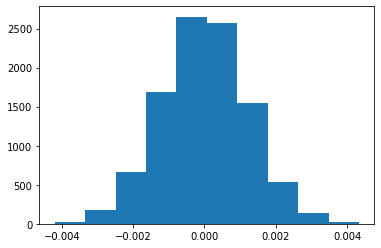

In [26]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
ob_diff = df2.query('landing_page == "new_page"')['converted'].mean() - df2.query('landing_page == "old_page"')['converted'].mean()
ob_diff
(ob_diff<p_diffs).mean()

0.9062

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

_The calculated value is called P-value which in our case represents the probability of the null hypothesis being True. Since this P-value exhibits a high value and is greater than 5% Type I error rate as defined for this problem, we **fail to reject the null hypothesis**_. This, in other words, means the old page has higher conversion rate than the new page as we assumed in null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique() 
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique() 
print(convert_new,convert_old,n_old,n_new)


17264 17489 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_old,convert_new]),np.array([n_old,n_new]), alternative = 'smaller')

print('Z-Score: {0:0.4f}'.format(z_score),'| P-Value: {0:0.4f}'.format(p_value))

Z-Score: 1.3109 | P-Value: 0.9051


In [30]:
# Calculating confidence interval from Z-score
import scipy.stats as st
st.norm.cdf(z_score)*100

90.50583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**_P-Value of 0.905 matches well to our finding in parts j and k. This value as stated above means there is not enough evidence that the new page is gaining more tractions thus we fail to reject null hypothesis._**

**_Converting the Z-score of 1.3109 to confidence interval results 90.5% confidence. This means we have 90.5% confidence that the null hypothesis stands_**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

_**Logistic Regression becasue the prediction is categorial**_

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df3 = df2.join(pd.get_dummies(df2['landing_page']))
df3['intercept'] = 1
df3['ab_page'] = pd.get_dummies(df2['group']) ['treatment']

df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
# Fitting simple logistic regression model
mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
res = mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
print(res.summary())


                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        11:23:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**_In this regression, we have picked `ab_page` as the feature to predict the conversion rate. This feature represents the group that received treatment which if we want to be consistent with the work done above, would be the "Alternative" hypothesis_**

**_The calculated P-value here equals to 0.19 which is different than above work due to the fact that the alternative hypothesis is chosen for regression fitting, therefore this P value, being high, suggests the opposite hypothesis, null in this case, is the likely choice_**

**_Another reason for the new P being different is that this P is calcuated based on two-tailed test where we previously calculated this based on one-tailed test manually_** 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**_Based on the available data, we could think about implementing the `timestamp` to see if that has any effect. The time stamp could be used as a quantitative variable or could turn into a categorial variable such as morning and evening. Adding this might provide more information on whether there are other influences in the prediction. One example would be to find out whether the time of the day has stronger effect on the outcome than the group, which is probably unlikely, but it is good to quantify it_**

**_Implementing multiple linear regression, however, makes the interpretation of the results more complicated and is prone to some potential problems such as whether a linear regression exists or multilinearity potential issue_**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
file_name2 = r"C:\Users\akhan\Documents\Amir\Professional\Professional Development\Data\Udacity\Phase II\3_practical_statistics\3_project\countries.csv"
countries_df = pd.read_csv(file_name2)
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,new_page,old_page,intercept,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1


In [35]:
### Create the necessary dummy variables

df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()


,country,timestamp,group,landing_page,converted,new_page,old_page,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0,1,0


In [36]:
#Checking the total number of the countries
print(df_new['CA'].sum(), df_new['UK'].sum(),df_new['US'].sum())


14499 72466 203619


In [37]:
# Printing the observed conversion rates for each country
print('US Observed Conversion Rate % : ',df_new.query('country == "US"').converted.mean()*100)
print('UK Observed Conversion Rate % : ',df_new.query('country == "UK"').converted.mean()*100)
print('Canada Observed Conversion Rate % : ',df_new.query('country == "CA"').converted.mean()*100)

# Fitting multi linear logistic regression model
mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','CA']])
res2 = mod2.fit()
print(res2.summary())

US Observed Conversion Rate % :  11.95468006423762
UK Observed Conversion Rate % :  12.059448568984076
Canada Observed Conversion Rate % :  11.531829781364232
Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        11:23:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
### Fit Your Linear Model And Obtain the Results

# Adding the interaction terms
df_new['UK_new_page'] = df_new['UK']*df_new['ab_page']
df_new['CA_new_page'] = df_new['CA']*df_new['ab_page']

# Fitting a logistic regression model with interaction terms
mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','CA','UK_new_page','CA_new_page']])
res2 = mod2.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 09 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        11:23:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page        -0.0206    

<a id='conclusions'></a>
## Conclusions

**_The P-value of the `ab_page` of multiple linear regression with only linear term used in section III.1(g) remained the same as what we found from the single linear regression III.1(d). This means that the addition of the countries to the inputs did not influence the impact of `ab_page` on the conversion rate. However, the Pseudo R-squ. did improved with the addition of the countries, suggesting the second fit would produce more accurate predictions in general_**

**_The P-values of the added countries are high which again shows they are not significant in the predictions_**

**_Looking at the coefficients, we can conclude that the conversion were likely to happen 1.1 more times for UK users and 1.04 times less in Canada when compared to the US users when all other parameters are held constant.
The coefficients also reveal for every user who views the new web page, the chance of conversion is reduced by 1.01 times_**

**_When we add the interaction terms in section III.1(h), first we notice that R-squ. continued to improve by ~50% compared to the last fit in III.1(g) which is promising. The P-values of this latest fit suggest that non of the terms used for this fit has a major significance to influence this model. The P-values are all high. The `ab_page` coefficient is changed comparing to the model without interaction terms which is expected since we have added two more interaction terms that brings in `ab_page` into the calculations so addition of those two term would influence the term excluded only to `ab_page`. Overall, the last model adds more complexity into the interpretation of the coefficients. This model tells us that if we are interested in knowing the influence of these variables, non of the input variables shows a very strong impact into the predictions we could consider not using this model for practicality reasons, however if the precision of the prediction is the goal of this exercise, the improved Pseudo R-squ. of the last model, suggests this may be worth consideration_**




### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.